In [2]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [8]:
import re #引入python的re模块，正则表达式

In [9]:
l="color or colour"

In [11]:
pattern = re.compile("colou?r") #从compile()函数的定义中，可以看出返回的是一个匹配对象，它单独使用就没有任何意义，需要和findall(), search(), match(）搭配使用
pattern.findall(l)

['color', 'colour']

In [16]:
def get_city_info(city_coordination):
    city_location={}
    for line in city_coordination.split("\n"):
        if line.startswith("//"):continue
        if line.strip()=="":continue
        
        city=re.findall("name:'(\w+)'",line)[0]
        x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]",line)[0]
        x_y=tuple(map(float,x_y))
        city_location[city]=x_y
        
    return city_location

In [18]:
city_info=get_city_info(coordination_source)

In [19]:
city_info

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

In [20]:
###Compute distance between cities

In [21]:
import math

def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [23]:
#重新进行封装
def get_city_distance(city1,city2):
    return geo_distance(city_info[city1],city_info[city2])

In [24]:
get_city_distance("上海","北京")

727.52769688981

In [25]:
###Draw the graoh

In [16]:
import networkx as nx #NetworkX 主要用于创造、操作复杂网络，以及学习复杂网络的结构、动力学及其功能。用于分析网络结构，建立网络模型，设计新的网络算法，绘制网络等等
import matplotlib.pyplot as plt #Matplotlib 是一个 Python 的 2D绘图库，它以各种硬拷贝格式和跨平台的交互式环境生成出版质量级别的图形

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [29]:
city_info.keys()

dict_keys(['兰州', '嘉峪关', '西宁', '成都', '石家庄', '拉萨', '贵阳', '武汉', '郑州', '济南', '南京', '合肥', '杭州', '南昌', '福州', '广州', '长沙', '沈阳', '长春', '哈尔滨', '太原', '西安', '北京', '上海', '重庆', '天津', '呼和浩特', '南宁', '银川', '乌鲁木齐', '香港', '澳门'])

In [30]:
city_graph=nx.Graph() #创建一个没有节点和边的空图
city_graph.add_nodes_from(list(city_info.keys()))

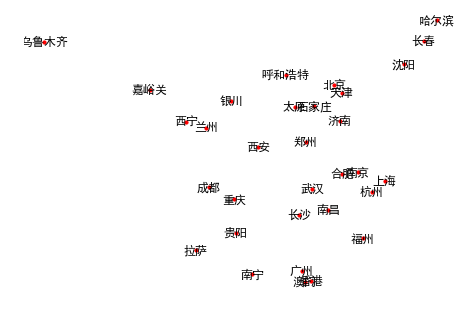

In [31]:
#画图
nx.draw(city_graph,city_info,with_labels=True,node_size=10)

In [42]:
threshold=700

In [43]:
from collections import defaultdict

In [58]:
def build_conection(city_info):
    cities_connection=defaultdict(list)
    cities = list(city_info.keys())
    
    for c1 in cities:
        for c2 in cities:
            if c1==c2:
                continue
            
            if get_city_distance(c1,c2) < threshold:
                cities_connection[c1].append(c2)
    return cities_connection #注意 此处的return位置不同，得到的结果也不同，要返回所有的return

In [59]:
cities_connection = build_conection(city_info)

In [60]:
cities_connection

defaultdict(list,
            {'兰州': ['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '嘉峪关': ['兰州', '西宁', '成都', '拉萨'],
             '西宁': ['兰州', '嘉峪关', '成都', '拉萨', '贵阳', '重庆', '银川'],
             '成都': ['兰州', '嘉峪关', '西宁', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '石家庄': ['武汉',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '南昌',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特'],
             '拉萨': ['兰州', '嘉峪关', '西宁', '成都', '贵阳', '重庆', '南宁', '银川'],
             '贵阳': ['兰州', '西宁', '成都', '拉萨', '西安', '重庆', '南宁', '银川'],
             '武汉': ['石家庄',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '杭州',
              '南昌',
              '福州',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特',
  

In [61]:
cities_connection_graph=nx.Graph(cities_connection)

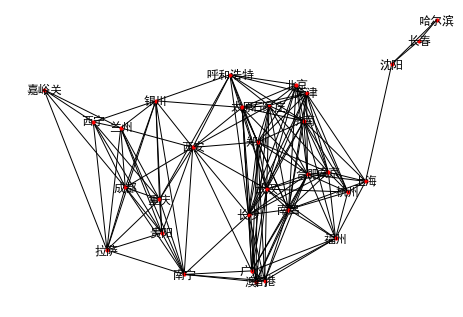

In [62]:
nx.draw(cities_connection_graph,city_info,with_labels=True,node_size=10)


#BFS算法


In [69]:
def bfs(graph,start ,destination):
    pathes=[[start]] #paths是要维护的搜索历史
    visited =set()
    
    while pathes:
        path =pathes.pop(0) #每次把第一条路径拿出来探索
        froniter =path[-1] #检查path路径最后的点是否有其他点相连
        
        if froniter in visited:continue #如果最后的点有经历过，就跳过
            
        successors = graph[froniter] #将图中所有的与这个点相连的点放在successors中
        
        for city in successors:
            if city in path:continue #遍历每个相连点的城市，在检查是否为环
                
            new_path = path + [city]
            
            pathes.append(new_path)  #每次有新拓展的路径  就放在之前路径的尾部
            
            
           
            
            if city==destination:
                return new_path #如果是我们需要的路径，如果是就返回
        
        visited.add(froniter)
        
        

In [70]:
bfs(cities_connection,"上海","香港")

['上海', '合肥', '香港']

In [71]:
bfs(cities_connection,"拉萨","西安")

['拉萨', '兰州', '西安']

In [79]:
def dfs(graph,start ,destination):
    pathes=[[start]]
    visited =set()
    
    while pathes:
        path =pathes.pop(0)
        froniter =path[-1]
        
        if froniter in visited:continue
            
        successors = graph[froniter]
        
        for city in successors:
            if city in path:continue
                
            new_path = path + [city] #dfs与bfs的区别：将新增的点放在维护list的前面
            
            pathes.append(new_path)
            
            
            pathes = [new_path] + pathes
            
            if city==destination:
                return new_path
        
        visited.add(froniter)

In [80]:
dfs(cities_connection,"拉萨","北京")

['拉萨', '银川', '南宁', '澳门', '香港', '长沙', '北京']

In [81]:
bfs(cities_connection,"拉萨","北京")

['拉萨', '重庆', '呼和浩特', '北京']

In [82]:
dfs(cities_connection,"拉萨","西安")

['拉萨', '银川', '西安']

In [83]:
bfs(cities_connection,"拉萨","西安")

['拉萨', '兰州', '西安']

In [109]:
def bfs_2(graph,start,destination,search_strategy):
    pathes=[[start]]
    
    #visite=set()
    
    while pathes:
        path=pathes.pop(0)
        froniter=path[-1]
        
                
        #if froniter in visite : continue
        
        successors=  graph[froniter]
        
        for city in successors:
            if city in path :continue
                
            new_path = path+[city]
                
            pathes.append(new_path)
                
        pathes = search_strategy(pathes) # 一条路经过G  不是最短的
            
        if pathes and pathes[0][-1] == destination: #这条路，经过重排之后是最短的，并且最后一点是终点
            return pathes[0]                      # 经过重排 path=[]
     #   visite.add(froniter)

In [95]:
#排序函数
def sort_by_distance(pathes):
    def get_distance_of_path(path):
        distance = 0
        for i,_ in enumerate(path[:-1]):
                distance +=get_city_distance(path[i],path[i+1])
            
        return distance
    return sorted(pathes,key = get_distance_of_path)

In [96]:
def get_diatance_of_path(path):
    distance =0
    for i,_ in enumerate(path[:-1]):
        distance += get_city_distance(path[i],path[i+1])
    
    return distance

In [97]:
get_diatance_of_path(["北京","济南","上海"])

752.66259009181

In [98]:
get_diatance_of_path(["北京","天津","上海"])

732.5085345714293

In [110]:
bfs_2(cities_connection,"北京","上海",search_strategy=sort_by_distance)

['北京', '天津', '上海']

In [111]:
bfs(cities_connection,"北京","上海")

['北京', '济南', '上海']

In [115]:
get_diatance_of_path(["北京","济南","上海"])

752.66259009181



梯度下降


In [1]:
from sklearn.datasets import load_boston #sklearn.datasets模块主要提供了一些导入、在线下载及本地生成数据集的方法
import random

In [2]:
dataset = load_boston()


In [3]:
dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
x,y = dataset['data'],dataset['target']

In [5]:
x


array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [6]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [7]:
x.shape #x的描述

(506, 13)

In [9]:
x.shape[1]
x[1]

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

In [ ]:
y.shape #y的描述

In [ ]:
x[1].shape
x[1]

In [10]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [11]:
dataset['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [12]:
X_rm=x[:,5]

In [13]:
X_rm.shape

(506,)

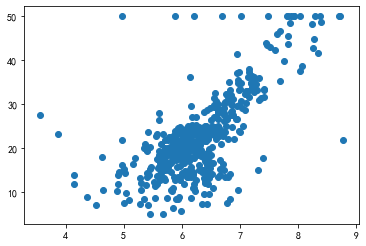

In [17]:
plt.scatter(X_rm,y)

$$y=k*rm+b$$

In [22]:
def price(rm ,k,b):
    return k*rm+b

$$loss = \frac{1}{n}\sum{(y_i-\hat{y_i})}^2$$
$$loss = \frac{1}{n}\sum{(y_i-(kx_i+b_i))}^2$$

In [35]:
def loss(y,y_hat):
    return sum((y_i -y_hat_i)**2 for y_i,y_hat_i in zip(list(y),list(y_hat)))/len(list(y))


$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - \hat{y_i})x_i$$

$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - \hat{y_i})$$


In [40]:
def partial_derivative_k(x,y,y_hat):
    n=len(y)
    gradient =0
    for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    return -2/n * gradient

def partial_derivative_b(y,y_hat):
    n=len(y)
    gradient =0
    for y_i,y_hat_i in zip(list(y),list(y_hat)):
        gradient += (y_i - y_hat_i) 
    return -2/n *gradient

In [41]:
#initialized parameters

k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100

learning_rate = 1e-3

iteration_num = 200 
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

Iteration 0, the loss is 179168.5822412377, parameters k is 76.68522067746369 and b is -38.84113899727919
Iteration 1, the loss is 151011.85580318092, parameters k is 71.33243505987005 and b is -39.682268256378904
Iteration 2, the loss is 127281.15970982292, parameters k is 66.41833038514794 and b is -40.45443465583952
Iteration 3, the loss is 107280.75453487839, parameters k is 61.906954731339454 and b is -41.1632900200576
Iteration 4, the loss is 90424.26597421218, parameters k is 57.765302601940895 and b is -41.814022980410876
Iteration 5, the loss is 76217.49345278223, parameters k is 53.96307345277735 and b is -42.41139693605771
Iteration 6, the loss is 64243.92109216399, parameters k is 50.47245000871129 and b is -42.959784903674404
Iteration 7, the loss is 54152.50624744622, parameters k is 47.26789474831699 and b is -43.463201511096116
Iteration 8, the loss is 45647.38759633653, parameters k is 44.325963067572516 and b is -43.9253323689317
Iteration 9, the loss is 38479.2110409

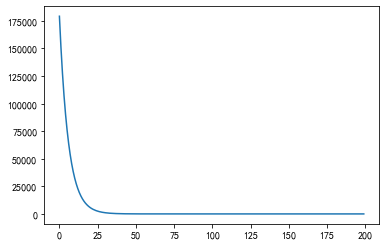

In [42]:
plt.plot(list(range(iteration_num)),losses)

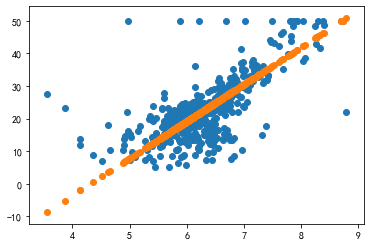

In [43]:


price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]

plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_current_parameters)



   
   
# 问答作业



In [ ]:
What conditions are required to make the BFS return the optimal solution ?

是BFS返回最优的解，需要一个队列，将其是节点放入队列的尾部，在队列不为空的情况下取出并删除队列首节点并处理，再将该节点相邻的未处理的节点加入到队列的尾部

In [ ]:
Is there a way to make DFS find the optimal solution ? (You may need to read some material about iterative DFS)

In [ ]:
有方法
迭代加深搜索算法：
    就是仿广度优先搜索的深度优先搜索，既能满足深度优先搜索的线性存储要求，又能保证发现一个最小深度的目标结点。迭代加深搜索并不比广度优先搜索慢很多，但是空间复杂度却与深度优先搜索相同，比广度优先搜索小很多。

In [ ]:
In what conditions BFS is a better choice than DFS and vice versa ?

在搜索路径上：BFS是用来搜索最短径路的解是比较合适的,DFS适合搜索全部的解。

因为BFS搜索过程中遇到的解一定是离根最近的，所以遇到一个解，一定就是最优解，此时算法可以终止。因为DFS搜索到的解不一定是离根最近的，只有全局搜索完毕，才能从所有解中找出离根的最近的解

在空间上：DFS不需要保存搜索过程中的状态，而BFS在搜索过程中需要保存搜索过的状态，而且一般情况需要一个队列来记录

In [ ]:
 When can we use machine learning ?

In [ ]:
机器学习要发现的是资料中存在的模式，机器学习中目标函数非常重要.当模式相对复杂,人们无法直接定义规则的时候才比较适合使用机器学习

In [ ]:
What is the gradient of a function ?

In [ ]:
表示某一函数在该点处的方向导数沿着该方向取得最大值，即函数在该点处沿着该方向变化最快，变化率最大

In [ ]:
How can we find the maximum value of a function using the information of gradient ?¶

In [ ]:
利用梯度下降法得到函数的极小值的方法，在将原函数原函数取负值，求极小值最后在去相反数

# 编程题没时间做



In [44]:
coordination_source1 = """
{name:'罗湖', geoCoord:[114.1259076289, 22.5509411122]},
{name:'国贸', geoCoord:[114.1144827975, 22.5435623514]},
{name:'老街', geoCoord:[113.9266401, 22.68480183]},
{name:'大剧院', geoCoord:[114.1003787, 22.54527588]},
{name:'科学馆', geoCoord:[114.0906559, 22.54501001]},
{name:'华强路', geoCoord:[114.080071, 22.54312513]},
{name:'岗厦', geoCoord:[114.0498936, 22.52552734]},
{name:'会展中心', geoCoord:[114.054669, 22.53355681]},
{name:'购物公园', geoCoord:[114.0489306, 22.53851157]},
{name:'香蜜湖', geoCoord:[114.0270213, 22.55042409]},
{name:'车公庙', geoCoord:[114.0223887, 22.53592929]},
{name:'竹子林', geoCoord:[114.0498936, 22.52552734]},
{name:'侨城东', geoCoord:[113.9918026, 22.53525157]},
{name:'华侨城', geoCoord:[113.9792732, 22.53724392]},
{name:'世界之窗', geoCoord:[113.9690502, 22.53900951]},
{name:'白石洲', geoCoord:[113.9634593, 22.53591435]},
{name:'高新园', geoCoord:[113.9489963, 22.54327562]},
{name:'深大', geoCoord:[113.9389145, 22.54121897]},
{name:'桃园', geoCoord:[113.919928, 22.53537213]},
{name:'大新', geoCoord:[113.9103496, 22.53523727]},
{name:'鲤鱼门', geoCoord:[113.8984971, 22.53517084]},
{name:'新安', geoCoord:[113.8895625, 22.5507637]},
{name:'宝安中心', geoCoord:[113.8823254, 22.55754161]},
{name:'宝体', geoCoord:[113.8764448, 22.56324353]},
{name:'坪洲', geoCoord:[113.8658604, 22.57196612]},
{name:'西乡', geoCoord:[113.8786881, 22.58338691]},
{name:'固戍', geoCoord:[113.8420849, 22.60374731]},
{name:'后瑞', geoCoord:[113.830458, 22.63168988]},
{name:'机场东', geoCoord:[113.8176654, 22.64996891]},
{name:'地铁2号线', geoCoord:[114.081398, 22.54750013]},
{name:'赤湾', geoCoord:[113.883894, 22.47759275]},
{name:'蛇口港', geoCoord:[113.9072828, 22.47974032]},
{name:'海上世界', geoCoord:[113.9110652, 22.48632377]},
{name:'水湾', geoCoord:[113.9149106, 22.49158365]},
{name:'东角头', geoCoord:[113.9262169, 22.48930596]}，
{name:'湾厦', geoCoord:[113.9294706, 22.49309079]},
{name:'海月', geoCoord:[113.9328901, 22.50297252]},
{name:'登良', geoCoord:[113.9329261, 22.51223452]},
{name:'后海', geoCoord:[113.9272545, 22.51287787]},
{name:'科苑', geoCoord:[113.9416451, 22.53001872]},
{name:'红树湾', geoCoord:[113.9637751, 22.52792128]},
{name:'世界之窗', geoCoord:[113.9690502, 22.53900951]}，
{name:'侨城北', geoCoord:[113.9844568, 22.54700256]},
{name:'深康', geoCoord:[113.9941556, 22.5493593]},
{name:'安托山', geoCoord:[114.0011576, 22.5513923]},
{name:'侨香', geoCoord:[114.0093639, 22.55251136]},
{name:'香蜜', geoCoord:[114.018871, 22.55549565]},
{name:'香梅北', geoCoord:[114.0284024, 22.55640544]},
{name:'景田', geoCoord:[114.0498936, 22.52552734]}，
{name:'莲花西', geoCoord:[114.0445509, 22.54967155]},
{name:'福田', geoCoord:[114.0498936, 22.52552734]},
{name:'市民中心', geoCoord:[114.0544994, 22.54639179]},
{name:'岗厦北', geoCoord:[114.0641624, 22.54327351]},
{name:'华强北', geoCoord:[114.080993, 22.54597613]},
{name:'燕南', geoCoord:[114.0878539, 22.54708001]},
{name:'大剧院', geoCoord:[114.1003787, 22.54527588]}，
{name:'湖贝', geoCoord:[114.1201948, 22.54696235]},
{name:'黄贝岭', geoCoord:[114.1318426, 22.54887211]},
{name:'新秀', geoCoord:[114.1439215, 22.5505103]},
{name:'地铁3号线', geoCoord:[114.2104693, 22.72244765]},
{name:'益田', geoCoord:[114.0461982, 22.51908909]},
{name:'石厦', geoCoord:[114.0485226, 22.52612634]},
{name:'购物公园', geoCoord:[114.0489306, 22.53851157]}，
{name:'福田', geoCoord:[114.0498936, 22.52552734]},
{name:'少年宫', geoCoord:[114.0568274, 22.55060179]},
{name:'莲花村', geoCoord:[114.0632544, 22.55171679]},
{name:'华新', geoCoord:[114.081568, 22.55169913]},
{name:'通新岭', geoCoord:[114.3368211, 22.69263988]},
{name:'红岭', geoCoord:[114.0994587, 22.55104688]},
{name:'老街', geoCoord:[113.9266401, 22.68480183]}，
{name:'晒布', geoCoord:[114.1176627, 22.5520467]},
{name:'翠竹', geoCoord:[114.1250458, 22.55916846]},
{name:'田贝', geoCoord:[114.1249969, 22.57011739]},
{name:'水贝', geoCoord:[114.1226461, 22.56998962]},
{name:'草埔', geoCoord:[114.1112472, 22.58723999]},
{name:'布吉', geoCoord:[114.1164717, 22.60435553]},
{name:'木棉湾', geoCoord:[114.1265108, 22.60699732]}，
{name:'大芬', geoCoord:[114.1332583, 22.61675955]},
{name:'丹竹头', geoCoord:[114.1430321, 22.62234202]},
{name:'六约', geoCoord:[114.1757831, 22.63707584]},
{name:'塘坑', geoCoord:[113.9456353, 22.68181806]},
{name:'横岗', geoCoord:[114.243161, 22.72250563]},
{name:'永湖', geoCoord:[114.2131172, 22.66172441]},
{name:'荷坳', geoCoord:[114.2194346, 22.67595133]}，
{name:'大运', geoCoord:[114.21202, 22.69819019]},
{name:'爱联', geoCoord:[114.2297126, 22.70449259]},
{name:'吉祥', geoCoord:[114.2395707, 22.71252614]},
{name:'龙城广场', geoCoord:[114.2448915, 22.72119638]},
{name:'南联', geoCoord:[114.2609267, 22.72484154]},
{name:'双龙', geoCoord:[114.2727401, 22.73162329]},
{name:'地铁4号线', geoCoord:[114.0373936, 22.60619135]}，
{name:'清湖', geoCoord:[114.0315145, 22.66684079]},
{name:'龙华', geoCoord:[114.0368901, 22.75454788]},
{name:'龙胜', geoCoord:[114.0073876, 22.64764042]},
{name:'上塘', geoCoord:[114.0083154, 22.63985551]},
{name:'红山', geoCoord:[114.0184528, 22.6246871]},
{name:'深圳北站', geoCoord:[114.0239318, 22.61196079]},
{name:'白石龙', geoCoord:[114.0375256, 22.60424535]},
{name:'民乐', geoCoord:[114.0434372, 22.5972291389]},
{name:'上梅林', geoCoord:[114.0546246, 22.57219162]},
{name:'莲花北', geoCoord:[114.0541785, 22.56324932]},
{name:'少年宫', geoCoord:[114.0568274, 22.55060179]},
{name:'市民中心', geoCoord:[114.0544994, 22.54639179]},
{name:'会展中心', geoCoord:[114.054669, 22.53355681]}，
{name:'福民', geoCoord:[114.0498936, 22.52552734]},
{name:'福田口岸', geoCoord:[114.0640187, 22.51836509]},
{name:'地铁5号线', geoCoord:[114.0256408, 22.61356979]},
{name:'黄贝岭', geoCoord:[114.1318426, 22.54887211]},
{name:'怡景', geoCoord:[114.1350491, 22.55864953]},
{name:'太安', geoCoord:[114.1319692, 22.57596571]},
{name:'布心', geoCoord:[114.1329625, 22.58368484]}，
{name:'百鸽笼', geoCoord:[114.1252972, 22.59817273]},
{name:'布吉', geoCoord:[114.1164717, 22.60435553]},
{name:'长龙', geoCoord:[114.1088633, 22.61061046]},
{name:'下水径', geoCoord:[114.1056051, 22.61756695]},
{name:'上水径', geoCoord:[114.10142, 22.62399357]},
{name:'杨美', geoCoord:[114.0749238, 22.62939279]},
{name:'坂田', geoCoord:[114.0657303, 22.6301872]}，
{name:'五和', geoCoord:[114.0556669, 22.62963052]},
{name:'民治', geoCoord:[113.8790984, 22.55673861]},
{name:'深圳北站', geoCoord:[114.0239318, 22.61196079]},
{name:'长岭陂', geoCoord:[114.0053007, 22.60213517]},
{name:'塘朗', geoCoord:[113.995026, 22.59297458]},
{name:'大学城', geoCoord:[113.9690029, 22.59190696]},
{name:'西丽', geoCoord:[113.9488238, 22.58368623]}，
{name:'留仙洞', geoCoord:[113.9389484, 22.5834686]},
{name:'兴东', geoCoord:[113.9139042, 22.58475009]},
{name:'洪浪北', geoCoord:[113.9057565, 22.57770115]},
{name:'灵芝', geoCoord:[113.8996172, 22.57234971]},
{name:'翻身', geoCoord:[113.8883868, 22.56280599]},
{name:'宝安中心', geoCoord:[113.8823254, 22.55754161]},
{name:'宝华', geoCoord:[113.8801044, 22.55274261]}，
{name:'临海', geoCoord:[113.8841385, 22.5469397]},
{name:'深圳地铁7号线', geoCoord:[113.955482, 22.57117658]},
{name:'西丽湖', geoCoord:[113.9607328, 22.59665679]},
{name:'西丽', geoCoord:[113.9488238, 22.58368623]},
{name:'茶光', geoCoord:[113.9494387, 22.57698142]},
{name:'珠光', geoCoord:[113.955482, 22.57117658]},
{name:'龙井', geoCoord:[113.969894, 22.56690302]}，
{name:'桃源村', geoCoord:[113.9755235, 22.56084125]},
{name:'深云', geoCoord:[113.988789, 22.55877291]},
{name:'安托山', geoCoord:[114.0011576, 22.5513923]},
{name:'农林', geoCoord:[114.0133448, 22.543273]},
{name:'车公庙', geoCoord:[114.0223887, 22.53592929]},
{name:'上沙', geoCoord:[114.0498936, 22.52552734]},
{name:'沙尾', geoCoord:[114.0374685, 22.52359366]}，
{name:'石厦', geoCoord:[114.0485226, 22.52612634]},
{name:'皇岗村', geoCoord:[114.0575568, 22.5278546]},
{name:'福民', geoCoord:[114.0498936, 22.52552734]},
{name:'皇岗口岸', geoCoord:[114.0687197, 22.52143509]},
{name:'赤尾', geoCoord:[114.0787187, 22.53447716]},
{name:'华强南', geoCoord:[114.0818717, 22.53847316]},
{name:'华强北', geoCoord:[114.080993, 22.54597613]}，
{name:'华新', geoCoord:[114.081568, 22.55169913]},
{name:'黄木岗', geoCoord:[114.0819809, 22.55853345]},
{name:'八卦岭', geoCoord:[114.0894631, 22.56450351]},
{name:'红岭北', geoCoord:[114.099205, 22.56471439]},
{name:'笋岗', geoCoord:[114.1259076, 22.55094111]},
{name:'洪湖', geoCoord:[114.1163541, 22.56855062]},
{name:'田贝', geoCoord:[114.1249969, 22.57011739]},
{name:'太安', geoCoord:[114.1319692, 22.57596571]},
{name:'地铁9号线', geoCoord:[113.9876932, 22.52439033]},
{name:'红树湾南', geoCoord:[113.9668591, 22.52601728]},
{name:'深湾', geoCoord:[113.97374, 22.52607669]},
{name:'深圳湾公园', geoCoord:[113.9436855, 22.48949023]},
{name:'下沙', geoCoord:[114.0184665, 22.53068606]}，
{name:'车公庙', geoCoord:[114.0223887, 22.53592929]},
{name:'香梅', geoCoord:[114.0344931, 22.54828916]},
{name:'景田', geoCoord:[114.0498936, 22.52552734]},
{name:'梅景', geoCoord:[114.0328307, 22.56252637]},
{name:'下梅林', geoCoord:[114.0363743, 22.56835543]},
{name:'梅村', geoCoord:[114.0477651, 22.57121409]},
{name:'上梅林', geoCoord:[114.0546246, 22.57219162]}，
{name:'孖岭', geoCoord:[114.0632675, 22.57120132]},
{name:'银湖', geoCoord:[114.0845481, 22.57148551]},
{name:'泥岗', geoCoord:[114.093714, 22.56945539]},
{name:'红岭北', geoCoord:[114.099205, 22.56471439]},
{name:'园岭', geoCoord:[113.9363282, 22.69281995]},
{name:'红岭', geoCoord:[114.0994587, 22.55104688]},
{name:'红岭南', geoCoord:[114.0996587, 22.54196588]}，
{name:'鹿丹村', geoCoord:[114.1018034, 22.5366979]},
{name:'人民南', geoCoord:[114.112929, 22.53820333]},
{name:'向西村', geoCoord:[114.1207478, 22.54252835]},
{name:'文锦', geoCoord:[114.1259206, 22.54517011]},
{name:'深圳地铁11号线', geoCoord:[113.9190378, 22.52703414]},
{name:'福田', geoCoord:[114.0498936, 22.52552734]},
{name:'车公庙', geoCoord:[114.0223887, 22.53592929]}，
{name:'红树湾南', geoCoord:[113.9668591, 22.52601728]},
{name:'后海', geoCoord:[113.9272545, 22.51287787]},
{name:'南山', geoCoord:[113.9251234, 22.53586241]},
{name:'宝安', geoCoord:[113.8790984, 22.55673861]},
{name:'碧海湾', geoCoord:[113.8548523, 22.57982939]},
{name:'机场', geoCoord:[113.8085011, 22.62781261]},
{name:'机场北', geoCoord:[113.7922511, 22.65467542]}，
{name:'福永', geoCoord:[113.8790984, 22.55673861]},
{name:'桥头', geoCoord:[113.8058109, 22.69094504]},
{name:'塘尾', geoCoord:[113.8043452, 22.70733445]},
{name:'马安山', geoCoord:[113.8117708, 22.71944869]},
{name:'沙井', geoCoord:[113.8002755, 22.74206478]},
{name:'后亭', geoCoord:[113.821802, 22.75553233]},
{name:'松岗', geoCoord:[113.8790984, 22.55673861]}，
{name:'碧头', geoCoord:[113.8149207, 22.78620167]}
"""

In [8]:
import re

In [29]:
def get_station_info(city_coordination):
    city_location={}
    for line in city_coordination.split("\n"):
        if line.startswith("//"):continue
        if line.strip()=="":continue
        try:
            print(line)
            city=re.findall("name:'(\w+)'",line)[0]
            x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]",line)[0]
            x_y=tuple(map(float,x_y))
            city_location[city]=x_y
        except IndexError:
            pass
        
    return city_location

In [32]:
station_info=get_station_info(coordination_source1)

{name:'罗湖', geoCoord:[114.1259076289, 22.5509411122]},
{name:'国贸', geoCoord:[114.1144827975, 22.5435623514]},
{name:'老街', geoCoord:[113.9266401, 22.68480183]},
{name:'大剧院', geoCoord:[114.1003787, 22.54527588]},
{name:'科学馆', geoCoord:[114.0906559, 22.54501001]},
{name:'华强路', geoCoord:[114.080071, 22.54312513]},
{name:'岗厦', geoCoord:[114.0498936, 22.52552734]},
{name:'会展中心', geoCoord:[114.054669, 22.53355681]},
{name:'购物公园', geoCoord:[114.0489306, 22.53851157]},
{name:'香蜜湖', geoCoord:[114.0270213, 22.55042409]},
{name:'车公庙', geoCoord:[114.0223887, 22.53592929]},
{name:'竹子林', geoCoord:[114.0498936, 22.52552734]},
{name:'侨城东', geoCoord:[113.9918026, 22.53525157]},
{name:'华侨城', geoCoord:[113.9792732, 22.53724392]},
{name:'世界之窗', geoCoord:[113.9690502, 22.53900951]},
{name:'白石洲', geoCoord:[113.9634593, 22.53591435]},
{name:'高新园', geoCoord:[113.9489963, 22.54327562]},
{name:'深大', geoCoord:[113.9389145, 22.54121897]},
{name:'桃园', geoCoord:[113.919928, 22.53537213]},
{name:'大新', geoCoord:[113.9

In [33]:
station_info

{'罗湖': (114.1259076289, 22.5509411122),
 '国贸': (114.1144827975, 22.5435623514),
 '老街': (113.9266401, 22.68480183),
 '大剧院': (114.1003787, 22.54527588),
 '科学馆': (114.0906559, 22.54501001),
 '华强路': (114.080071, 22.54312513),
 '岗厦': (114.0498936, 22.52552734),
 '会展中心': (114.054669, 22.53355681),
 '购物公园': (114.0489306, 22.53851157),
 '香蜜湖': (114.0270213, 22.55042409),
 '车公庙': (114.0223887, 22.53592929),
 '竹子林': (114.0498936, 22.52552734),
 '侨城东': (113.9918026, 22.53525157),
 '华侨城': (113.9792732, 22.53724392),
 '世界之窗': (113.9690502, 22.53900951),
 '白石洲': (113.9634593, 22.53591435),
 '高新园': (113.9489963, 22.54327562),
 '深大': (113.9389145, 22.54121897),
 '桃园': (113.919928, 22.53537213),
 '大新': (113.9103496, 22.53523727),
 '鲤鱼门': (113.8984971, 22.53517084),
 '新安': (113.8895625, 22.5507637),
 '宝安中心': (113.8823254, 22.55754161),
 '宝体': (113.8764448, 22.56324353),
 '坪洲': (113.8658604, 22.57196612),
 '西乡': (113.8786881, 22.58338691),
 '固戍': (113.8420849, 22.60374731),
 '后瑞': (113.830458, 22.6316898

In [34]:
station_info.keys()

dict_keys(['罗湖', '国贸', '老街', '大剧院', '科学馆', '华强路', '岗厦', '会展中心', '购物公园', '香蜜湖', '车公庙', '竹子林', '侨城东', '华侨城', '世界之窗', '白石洲', '高新园', '深大', '桃园', '大新', '鲤鱼门', '新安', '宝安中心', '宝体', '坪洲', '西乡', '固戍', '后瑞', '机场东', '地铁2号线', '赤湾', '蛇口港', '海上世界', '水湾', '东角头', '湾厦', '海月', '登良', '后海', '科苑', '红树湾', '侨城北', '深康', '安托山', '侨香', '香蜜', '香梅北', '景田', '莲花西', '福田', '市民中心', '岗厦北', '华强北', '燕南', '湖贝', '黄贝岭', '新秀', '地铁3号线', '益田', '石厦', '少年宫', '莲花村', '华新', '通新岭', '红岭', '晒布', '翠竹', '田贝', '水贝', '草埔', '布吉', '木棉湾', '大芬', '丹竹头', '六约', '塘坑', '横岗', '永湖', '荷坳', '大运', '爱联', '吉祥', '龙城广场', '南联', '双龙', '地铁4号线', '清湖', '龙华', '龙胜', '上塘', '红山', '深圳北站', '白石龙', '民乐', '莲花北', '福民', '福田口岸', '地铁5号线', '怡景', '太安', '布心', '百鸽笼', '长龙', '下水径', '上水径', '杨美', '坂田', '五和', '民治', '长岭陂', '塘朗', '大学城', '西丽', '留仙洞', '兴东', '洪浪北', '灵芝', '翻身', '宝华', '临海', '深圳地铁7号线', '西丽湖', '茶光', '珠光', '龙井', '桃源村', '深云', '农林', '上沙', '沙尾', '皇岗村', '皇岗口岸', '赤尾', '华强南', '黄木岗', '八卦岭', '红岭北', '笋岗', '洪湖', '地铁9号线', '红树湾南', '深湾', '深圳湾公园', '下沙', '香梅', '梅景', '下梅林', '梅村', '上梅林', '孖岭',

In [35]:
import math

def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [64]:
#重新进行封装
def get_station_distance(station1,station2):
    return geo_distance(station_info[station1],station_info[station2])

In [36]:
import networkx as nx #NetworkX 主要用于创造、操作复杂网络，以及学习复杂网络的结构、动力学及其功能。用于分析网络结构，建立网络模型，设计新的网络算法，绘制网络等等
import matplotlib.pyplot as plt


In [42]:
city_graph=nx.Graph() #创建一个没有节点和边的空图
city_graph.add_nodes_from(list(station_info.keys()))

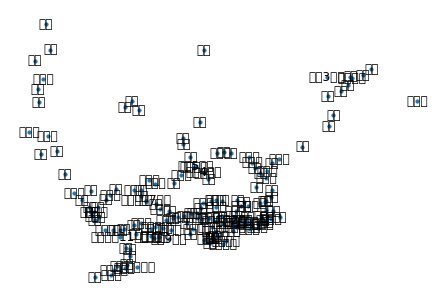

In [52]:
#画图
nx.draw(city_graph,station_info,with_labels=True,node_size=10)

In [53]:
threshold=700

In [54]:
from collections import defaultdict

In [62]:
def build_conection(station_info):
    cities_connection=defaultdict(list)
    cities = list(station_info.keys())
    
    for c1 in cities:
        for c2 in cities:
            if c1==c2:
                continue
            
            if get_station_distance(c1,c2) < threshold:
                cities_connection[c1].append(c2)
    return cities_connection #注意 此处的return位置不同，得到的结果也不同，要返回所有的return

In [65]:
cities_connection = build_conection(station_info)

In [66]:
cities_connection

defaultdict(list,
            {'罗湖': ['国贸',
              '老街',
              '大剧院',
              '科学馆',
              '华强路',
              '岗厦',
              '会展中心',
              '购物公园',
              '香蜜湖',
              '车公庙',
              '竹子林',
              '侨城东',
              '华侨城',
              '世界之窗',
              '白石洲',
              '高新园',
              '深大',
              '桃园',
              '大新',
              '鲤鱼门',
              '新安',
              '宝安中心',
              '宝体',
              '坪洲',
              '西乡',
              '固戍',
              '后瑞',
              '机场东',
              '地铁2号线',
              '赤湾',
              '蛇口港',
              '海上世界',
              '水湾',
              '东角头',
              '湾厦',
              '海月',
              '登良',
              '后海',
              '科苑',
              '红树湾',
              '侨城北',
              '深康',
              '安托山',
              '侨香',
              '香蜜',
              '香梅北',
              '景田',
     

In [67]:
cities_connection_graph=nx.Graph(cities_connection)

D:\OpenSources\Anaconda3\install\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


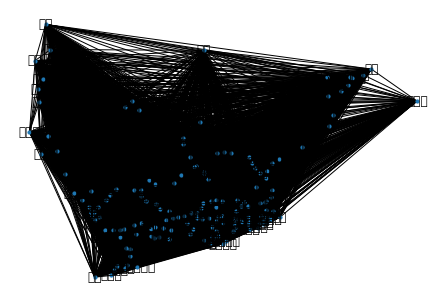

In [69]:
nx.draw(cities_connection_graph,station_info,with_labels=True,node_size=10)